In [495]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [496]:
# read the dataset By Using pandas here training dataset
df_train = pd.read_csv('/content/train (1).csv')


In [497]:
# here the capacity column conataining the  int and str elemenest so I want to taking numerical data only
res = df_train['capacity'].str.extract(r'(?i)(?P<Amount>\d+(?:\.\d+)?)\s?(?P<Unit>[CM]?L|LTR)\b')
res.Unit = res.Unit.str.lower()
df_train['capacity'] = res['Amount']

In [498]:
# here  I want to change the data types of some columns because some columns are are object type but actually those are float
df_train['lat'] = df_train['lat'].astype(float, errors = 'raise')
df_train['long'] = df_train['long'].astype(float, errors = 'raise')
df_train['pop'] = df_train['pop'].astype(float, errors = 'raise')
df_train['capacity'] = df_train['capacity'].astype(float, errors = 'raise')

df_train['date'] = pd.to_datetime(df_train['date'])

In [499]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   float64       
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6429 non-null   float64       
 4   long       6434 non-null   float64       
 5   pop        6480 non-null   float64       
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6464 non-null   object        
 9   capacity   4308 non-null   float64       
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 708.9+ KB


In [500]:
df_train.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500.0,0.96,13280.0
1,1.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,NaN,2.86,6727.0
2,2.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330.0,0.87,9848.0
3,3.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500.0,1.00,20050.0
4,4.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330.0,0.39,25696.0


In [501]:
df_train  = df_train.dropna(how = 'all') # after row 6479, all the values are Nan.

In [502]:
# I want see the null values in the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   float64       
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6429 non-null   float64       
 4   long       6434 non-null   float64       
 5   pop        6480 non-null   float64       
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6464 non-null   object        
 9   capacity   4308 non-null   float64       
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 658.1+ KB


In [503]:
# finding the shape of the data 
df_train.shape

(6480, 12)

In [504]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

lat 0.0011  % missing values
long 0.0017  % missing values
container 0.0004  % missing values
capacity 0.0481  % missing values


In [505]:
# I want to fill the missing values with mean
df_train['lat'].fillna(df_train['lat'].mean,inplace=True)
df_train['long'].fillna(df_train['long'].mean,inplace=True)
df_train['capacity'].fillna(df_train['capacity'].mean,inplace=True)
df_train['container'].fillna(df_train['container'].mode,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [506]:
# finall check for null values
df_train.isnull().sum()

id           0
date         0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

In [507]:
df_train.shape

(6480, 12)

In [508]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   float64       
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6480 non-null   object        
 4   long       6480 non-null   object        
 5   pop        6480 non-null   float64       
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6480 non-null   object        
 9   capacity   6480 non-null   object        
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 658.1+ KB


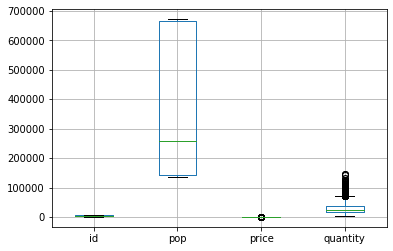

In [509]:
# finding the outliers in the data
df_train.boxplot()

In [510]:
# I want to clean the outliers also 
df_train.describe()

,id,pop,price,quantity
count,6480.000000,6480.000000,6480.000000,6480.000000
mean,3239.500000,355141.416667,1.188981,29431.855093
std,1870.759204,232828.796289,0.814567,17901.328301
min,0.000000,134219.000000,0.110000,2953.000000
25%,1619.750000,141439.750000,0.610000,16441.750000
50%,3239.500000,257501.500000,0.920000,25184.000000
75%,4859.250000,665871.000000,1.500000,37866.000000
max,6479.000000,672130.000000,4.540000,145287.000000


In [511]:
q1 = np.quantile(df_train['quantity'], 0.25)
q2 = np.quantile(df_train['quantity'], 0.50)
q3 = np.quantile(df_train['quantity'], 0.75)
IQR = q3 - q1
upperwhishker = q3 + (IQR * 0.5)
lowerwhishker = q1 - (IQR * 0.5)

In [512]:
df_train['quantity'] = np.where(df_train['quantity']>upperwhishker,upperwhishker,df_train['quantity'])

In [513]:
q1 = np.quantile(df_train['price'], 0.25)
q2 = np.quantile(df_train['price'], 0.50)
q3 = np.quantile(df_train['price'], 0.75)
IQR = q3 - q1
upperwhishker = q3 + (IQR * 0.5)
lowerwhishker = q1 - (IQR * 0.5)
df_train['price'] = np.where(df_train['price']>upperwhishker,upperwhishker,df_train['price'])

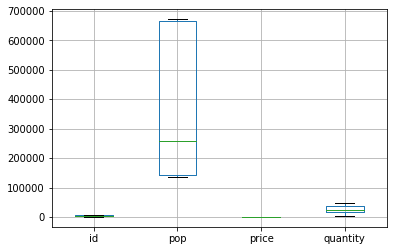

In [514]:
# Now clear the all outliers 
df_train.boxplot()

In [515]:
df_city = pd.get_dummies(df_train['city'])
df_shop = pd.get_dummies(df_train['shop'])
df_brand = pd.get_dummies(df_train['brand'])



# Now data is cleaned and no duplicate values no null values and no outliers 

In [516]:
df_brand

,adult-cola,gazoza,kinder-cola,lemon-boost,orange-power
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
6475,0,0,0,0,1
6476,0,0,0,0,1
6477,1,0,0,0,0
6478,0,1,0,0,0


In [517]:
df_city

,Athens,Irakleion,Larisa,Patra,Thessaloniki
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
6475,1,0,0,0,0
6476,0,0,1,0,0
6477,0,0,0,1,0
6478,0,0,0,0,1


In [518]:
df_shop

,shop_1,shop_2,shop_3,shop_4,shop_5,shop_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
6475,0,0,1,0,0,0
6476,0,0,0,0,1,0
6477,0,0,0,0,0,1
6478,0,0,0,1,0,0


# Now splitting the data Nested class for timeseries

In [521]:
import logging

class CustomTimeSeriesSplit:

    def __init__(self,
                 train_set_size: int,
                 test_set_size: int
                 ):
        """
        :param train_set_size: data points (days) in each fold for the train set
        :param test_set_size: data points (days) in each fold for the test set
        """
        self.train_set_size = train_set_size
        self.test_set_size = test_set_size
        self._logger = logging.getLogger(__name__)

    def split(self,
              x: np.array,
              y: np.array = None) -> (np.array, np.array):
        """Return train/test split indices.
        :param x: time series to use for prediction, shape (n_samples, n_features)
        :param y: time series to predict, shape (n_samples, n_features)
        :return: (train_indices, test_indices)
        Note: index of both x and y should be of type datetime.
        """
        if y is not None:
            assert x.index.equals(y.index)
        split_points = self.get_split_points(x)
        for split_point in split_points:
            is_train = (x.index < split_point) & (x.index >= split_point -
                                                  pd.Timedelta(self.train_set_size, unit='D'))
            is_test = (x.index >= split_point) & (x.index < split_point +
                                                  pd.Timedelta(self.test_set_size, unit='D'))
            if not is_train.any() or not is_test.any():
                self._logger.warning('Found %d train and %d test observations '
                                     'skipping fold for split point %s',
                                     is_train.sum(), is_test.sum(), split_point)
                continue
            dummy_ix = pd.Series(range(0, len(x)), index=x.index)
            ix_train = dummy_ix.loc[is_train].values
            ix_test = dummy_ix.loc[is_test].values
            if ix_train is None or ix_test is None:
                self._logger.warning('Found no data for train or test period, '
                                     'skipping fold for split date %s',
                                     split_point)
                continue
            yield ix_train, ix_test

    def get_split_points(self, x: np.array) -> pd.DatetimeIndex:
        """Get all possible split point dates"""
        start = x.index.min() + pd.Timedelta(self.train_set_size, unit='D')
        end = x.index.max() - pd.Timedelta(self.test_set_size - 1, unit='D')
        self._logger.info(f'Generating split points from {start} to {end}')
        split_range = pd.date_range(start, end, freq='D')
        first_split_point =  (len(split_range) + self.test_set_size - 1) % self.test_set_size
        return split_range[first_split_point::self.test_set_size]

# Nested CV timeseries Implementation

In [522]:
%load_ext autoreload
%autoreload 2

import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

No handles with labels found to put in legend.


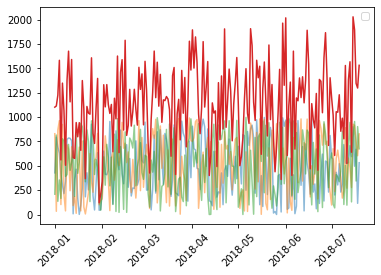

In [523]:
number_of_data_points = 200
columns = ['car usage', 'train usage', 'taxi usage']
date_index = pd.date_range(dt.datetime(2018,1,1), 
                           periods=number_of_data_points, 
                           freq='D')
x = pd.DataFrame(np.random.rand(number_of_data_points, len(columns))*999,
                 columns=columns,
                 index=date_index)
y = pd.Series(x.sum(axis=1) * .75 + np.random.randn(number_of_data_points)*100, name='travelers at the gate')

fig, ax = plt.subplots(1, 1)
for col in columns:
    ax.plot(x[col], alpha=.5)
ax.plot(y)
ax.legend()
plt.xticks(rotation=45);

# Specify the sizes of train and test set and initialize the cross validators

In [524]:
outer_train_set_size = 28
outer_test_set_size = 7

inner_train_set_size = 14
inner_test_set_size = 7

outer_loop_splitter = CustomTimeSeriesSplit(
    train_set_size=outer_train_set_size,
    test_set_size=outer_test_set_size)

inner_loop_splitter = CustomTimeSeriesSplit(
    train_set_size=inner_train_set_size,
    test_set_size=inner_test_set_size)

# Initialize algorithms: pipeline + parameter grid


In [525]:
# Initialize models
model_1 = SVR()
model_2 = ElasticNet()

# Initialize pipelines
pipeline_1 = Pipeline([('scaling', StandardScaler()),
                       ('model', model_1)])
pipeline_2 = Pipeline([('scaling', StandardScaler()),
                       ('model', model_2)])

# Initialize hyperparameter grids
param_grid_1 = [{'model__kernel': ['rbf'],
                 'model__C': np.power(10., np.arange(-4, 4)),
                 'model__gamma': np.power(10., np.arange(-5, 0))},
                {'model__kernel': ['linear'],
                 'model__C': np.power(10., np.arange(-4, 4))}]
param_grid_2 = [{'model__l1_ratio': [.1, .5, .7, .9, .95, .99, 1],
                 'model__alpha': [.1, .5, 1, 10, 100]}]

# Make a DataFrame to save all algorithms and include columns to save the results
algorithms = {
        'param_grid': [param_grid_1, param_grid_2],                                            
        'pipeline': [pipeline_1, pipeline_2],
    }
algorithm_names = ['SVR', 'ElasticNet']
algorithms_and_results = pd.DataFrame(algorithms, index=algorithm_names)
for column in ['scores_cv_inner', 'scores_cv_outer']:
    algorithms_and_results[column] = [[] for _ in range(len(algorithm_names))]
algorithms_and_results


,param_grid,pipeline,scores_cv_inner,scores_cv_outer
SVR,"[{'model__kernel': ['rbf'], 'model__C': [0.000...","(StandardScaler(), SVR())",[],[]
ElasticNet,"[{'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95...","(StandardScaler(), ElasticNet())",[],[]


# Run the nested cross validation and save the results

In [526]:
# The outer loop for algorithm selection and performance estimation
for outer_train_idx, outer_test_idx in outer_loop_splitter.split(x, y):
    x_train = x.iloc[outer_train_idx]
    y_train = y.iloc[outer_train_idx]
    x_test = x.iloc[outer_test_idx]
    y_test = y.iloc[outer_test_idx]

    # The grid search estimators need to be rebuild each outer fold, because the inner loop
    # cross validation can only be defined given the train set from the outer loop.
    grid_search_cv_estimators = {}
    for (name, param_grid, pipeline) in algorithms_and_results[['param_grid', 'pipeline']].itertuples():
        
        # The inner loop for hyperparameter tuning
        grid_search_cv_estimator = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='r2',
            cv=inner_loop_splitter.split(x_train, y_train),
            n_jobs=4,
            refit=True)
        grid_search_cv_estimator.fit(x_train, y_train)

        outer_score = grid_search_cv_estimator.score(x_test, y_test)
        algorithms_and_results.loc[name, 'scores_cv_inner'].append(grid_search_cv_estimator.best_score_)
        algorithms_and_results.loc[name, 'scores_cv_outer'].append(outer_score)
algorithms_and_results

,param_grid,pipeline,scores_cv_inner,scores_cv_outer
SVR,"[{'model__kernel': ['rbf'], 'model__C': [0.000...","(StandardScaler(), SVR())","[0.9395158483405918, 0.9276687263564669, 0.881...","[0.9408599838979437, 0.8579890953332072, 0.864..."
ElasticNet,"[{'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95...","(StandardScaler(), ElasticNet())","[0.9478594692628222, 0.9041160350046464, 0.857...","[0.942135194673945, 0.8690752054813462, 0.8708..."


# Combine the results

In [527]:
for agg_function in [np.mean, np.median, np.std]:
    for column in ['scores_cv_outer', 'scores_cv_inner']:
        aggregation_dict = {column + '_' + agg_function.__name__: lambda df: df[column].map(agg_function)}
        algorithms_and_results = algorithms_and_results.assign(**aggregation_dict)
algorithms_and_results.T

,SVR,ElasticNet
param_grid,"[{'model__kernel': ['rbf'], 'model__C': [0.000...","[{'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95..."
pipeline,"(StandardScaler(), SVR())","(StandardScaler(), ElasticNet())"
scores_cv_inner,"[0.9395158483405918, 0.9276687263564669, 0.881...","[0.9478594692628222, 0.9041160350046464, 0.857..."
scores_cv_outer,"[0.9408599838979437, 0.8579890953332072, 0.864...","[0.942135194673945, 0.8690752054813462, 0.8708..."
scores_cv_outer_mean,0.846902,0.850111
scores_cv_inner_mean,0.841577,0.860592
scores_cv_outer_median,0.894229,0.873601
scores_cv_inner_median,0.858751,0.872913
scores_cv_outer_std,0.178389,0.169394
scores_cv_inner_std,0.0941503,0.0793982


# Select the best algorithm on metric of choice (here mean outer score)

In [528]:
best_algorithm_name = algorithms_and_results['scores_cv_outer_mean'].idxmax()
best_pipeline = algorithms_and_results.loc[best_algorithm_name, 'pipeline']
best_param_grid = algorithms_and_results.loc[best_algorithm_name, 'param_grid']
print(f'Choose best estimater: {best_algorithm_name}')

Choose best estimater: ElasticNet


# Expected score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


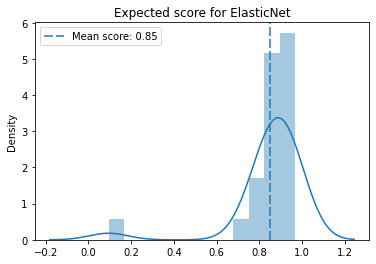

In [529]:
scores, mean_score = algorithms_and_results.loc[best_algorithm_name, ['scores_cv_outer', 'scores_cv_outer_mean']]
ax = sns.distplot(scores)
ax.set_title(f'Expected score for {best_algorithm_name}')
ax.axvline(mean_score, dashes=[6, 2], label=f'Mean score: {round(mean_score,2)}')
ax.legend();


# Search for final hyperparameters on most recent 'outer train set size' data points

In [530]:
x_most_recent = x.iloc[-outer_train_set_size:]
y_most_recent = y.iloc[-outer_train_set_size:]
    
grid_search_cv_estimator = GridSearchCV(
    estimator=best_pipeline,
    param_grid=best_param_grid,
    scoring='r2',
    cv=inner_loop_splitter.split(x_most_recent, y_most_recent),
    n_jobs=4,
    refit=True)
grid_search_cv_estimator.fit(x_most_recent, y_most_recent)
print(f'Final hyperparameters: {grid_search_cv_estimator.best_params_}')

Final hyperparameters: {'model__alpha': 0.1, 'model__l1_ratio': 1}
